In [138]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
from astropy.coordinates import AltAz, EarthLocation, SkyCoord
from astropy.time import Time
from astropy.coordinates import get_sun
from astropy.coordinates import get_body

import csv

In [205]:
filename = 'PS_2024.08.03_20.42.29.csv'
rows = []
with open(filename) as fn:
    reader = csv.reader(fn, delimiter=',', quotechar='|')

    while True:
        labels = next(reader)
        if labels[0][0] != '#':
            break
        continue
    for r in reader:
        if r[0] == '#':
            continue
        rows.append(r)
        

In [226]:
def get_index(l, val):
    for i,el in enumerate(l):
        if el == val:
            return i
    return None

In [228]:
get_index(labels,'ra')

74

In [229]:
get_index(labels,'dec')

76

In [240]:
data = {}
for l in labels:
    data[l] = []

for r in rows:
    if r[0] in data[labels[0]]:
        continue
    for i,c in enumerate(r):
        data[labels[i]].append(c)


In [252]:
location = EarthLocation.of_site('Keck Observatory')

to_hst_offset = -10 * u.hour # to hst

midnight = Time('2024-08-03 00:00:00') - to_hst_offset
delta_midnight = np.linspace(-12, 12, 1000) * u.hour

times = midnight + delta_midnight
frame = AltAz(obstime=times, location=location)
altaz = target.transform_to(frame)

In [254]:
#target = SkyCoord.from_name('M33')

sun = get_sun(times)
moon = get_body('moon', times)

altaz_sun = sun.transform_to(frame)
altaz_moon = moon.transform_to(frame)

In [256]:
altaz_data = []
for ra,dec in zip(data['ra'],data['dec']):
    ra = float(ra)
    dec = float(dec)
    target = SkyCoord(ra=ra*u.degree, dec=dec*u.degree, frame='icrs')
    altaz_data.append(target.transform_to(frame))

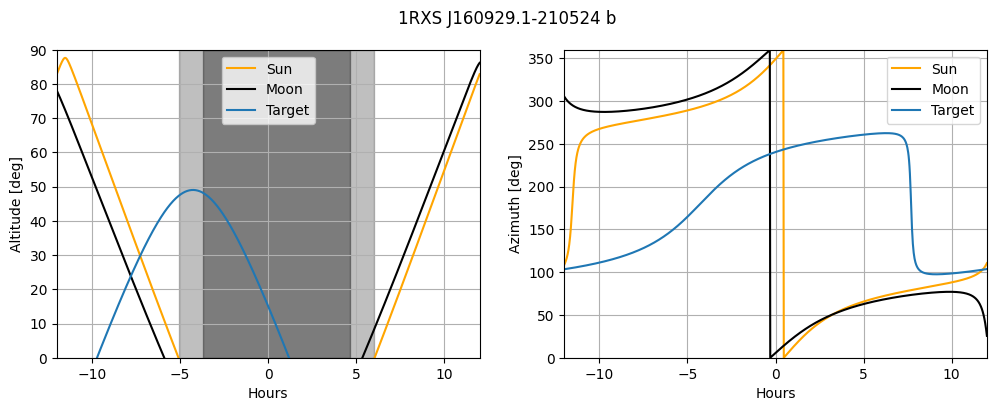

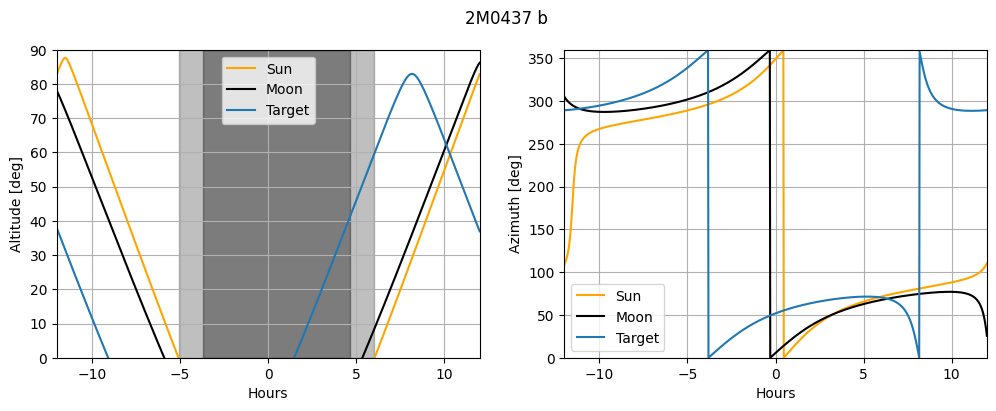

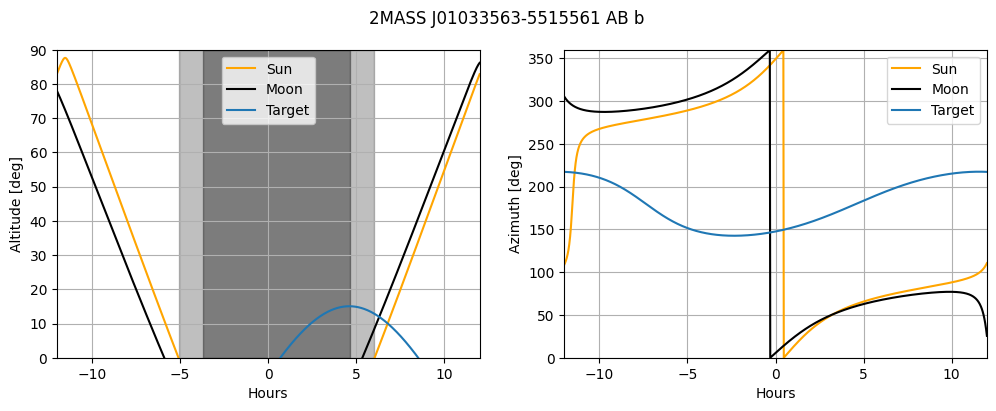

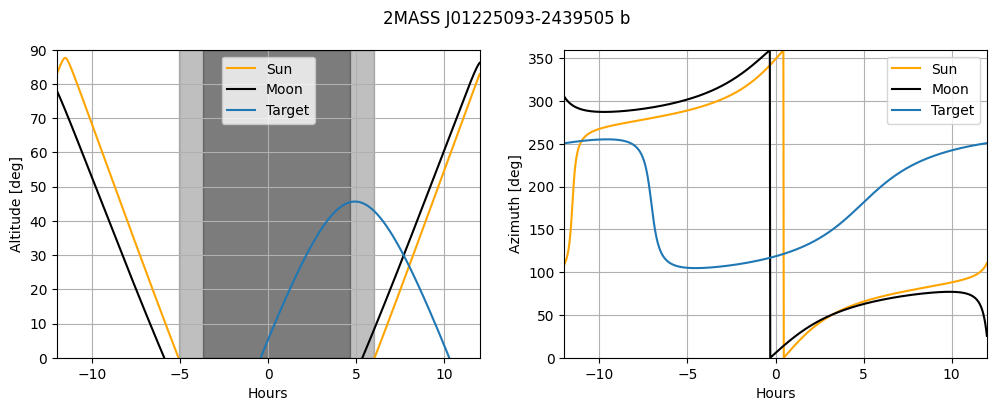

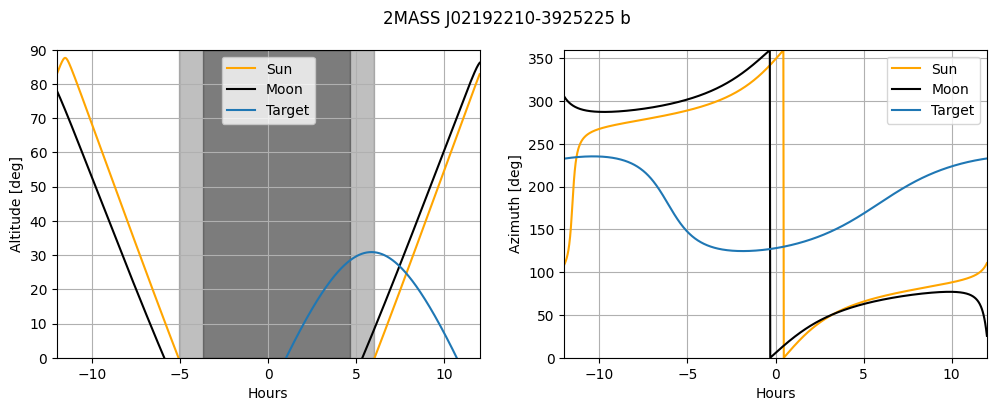

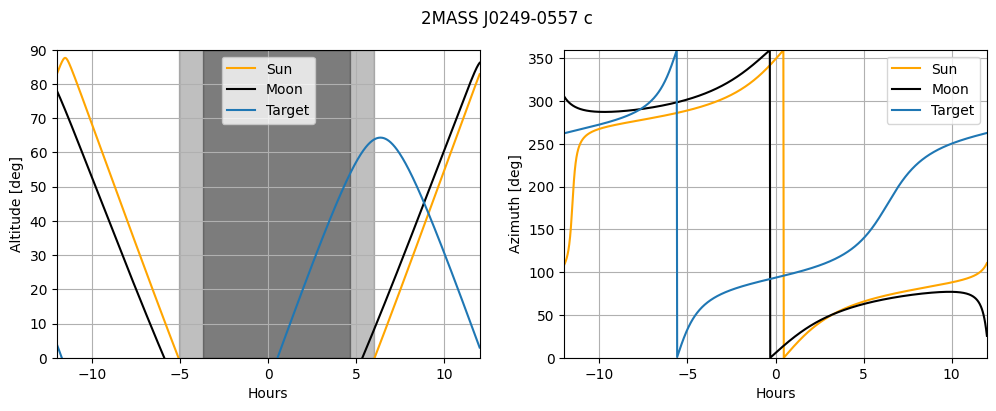

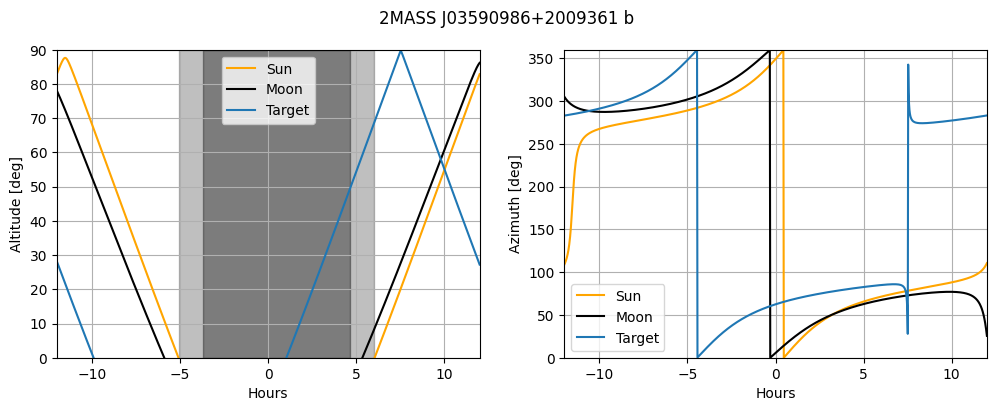

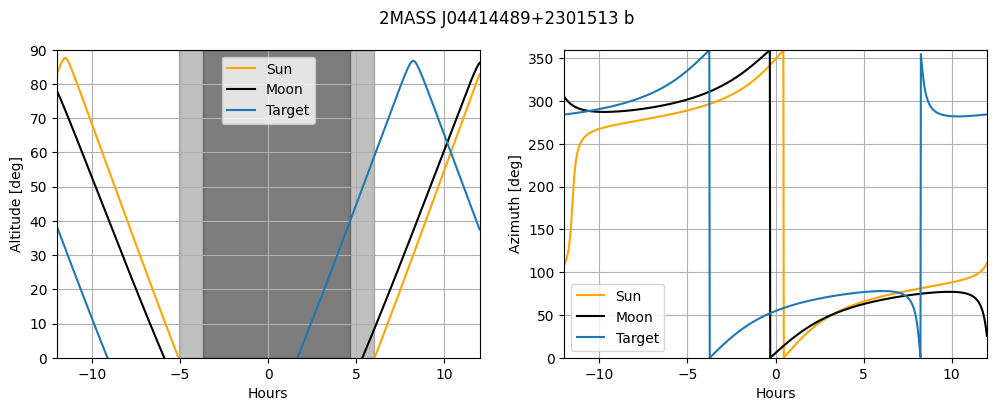

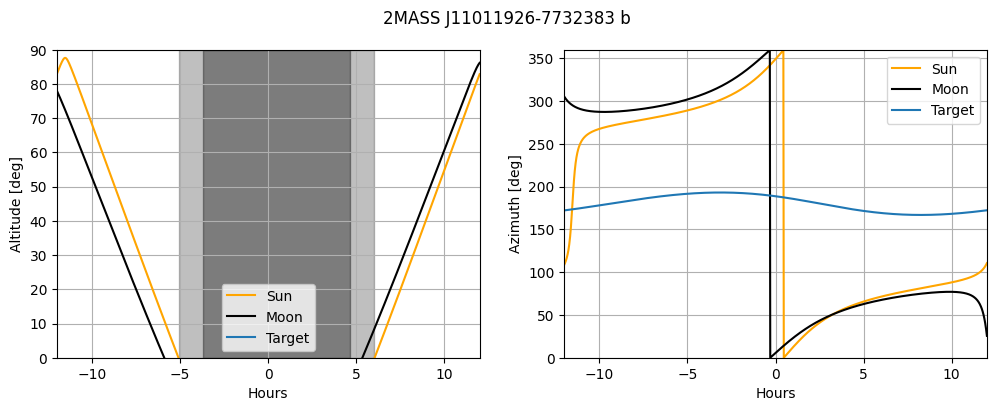

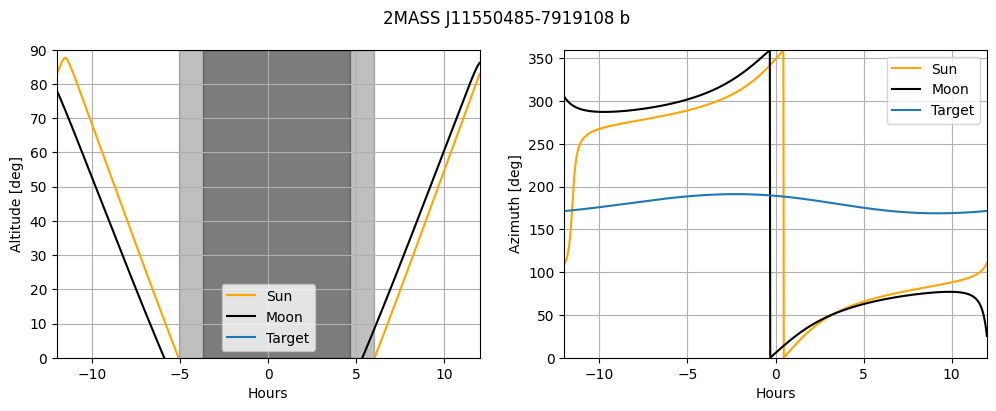

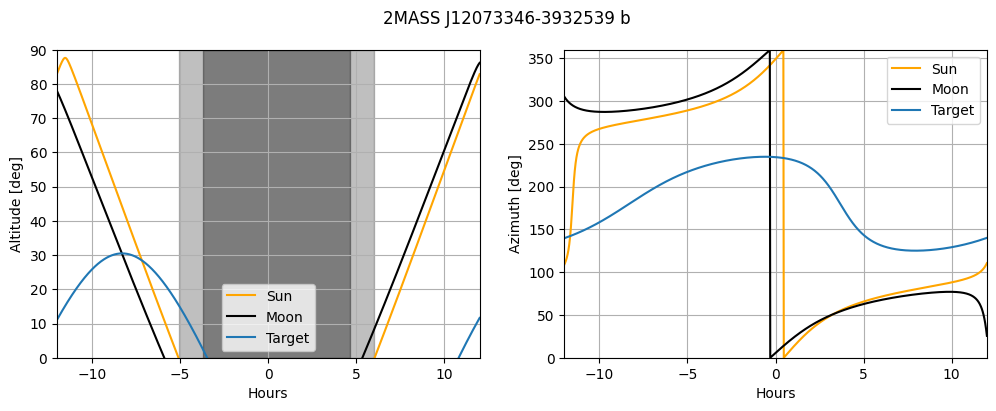

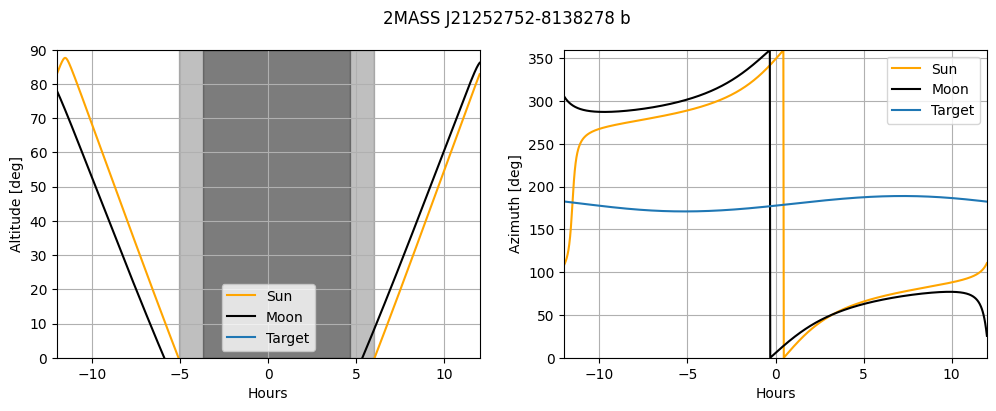

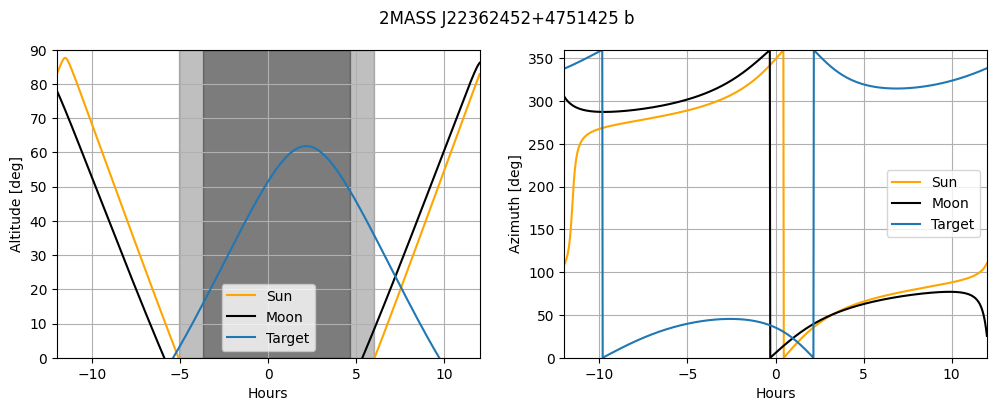

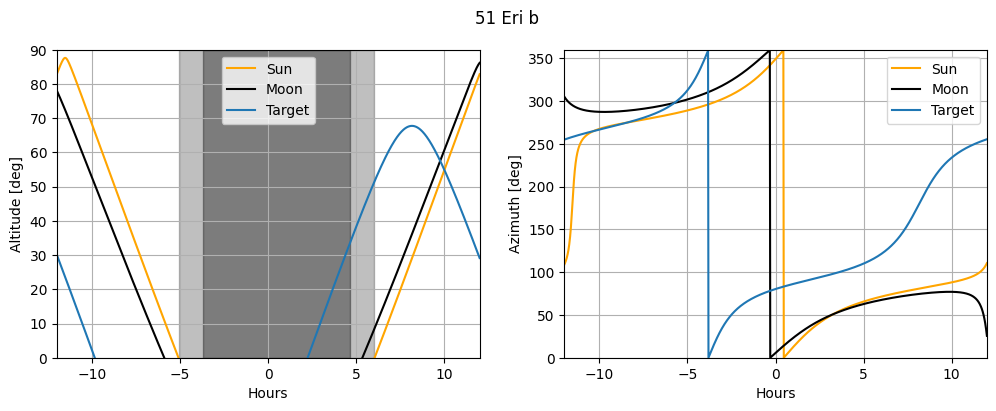

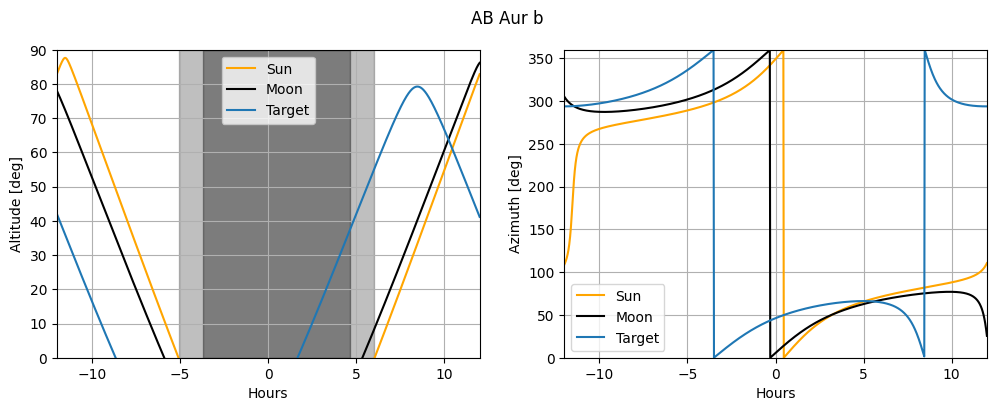

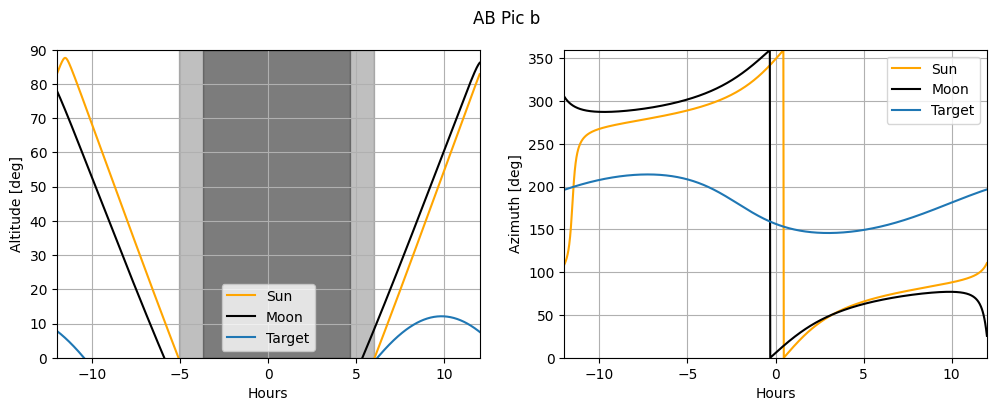

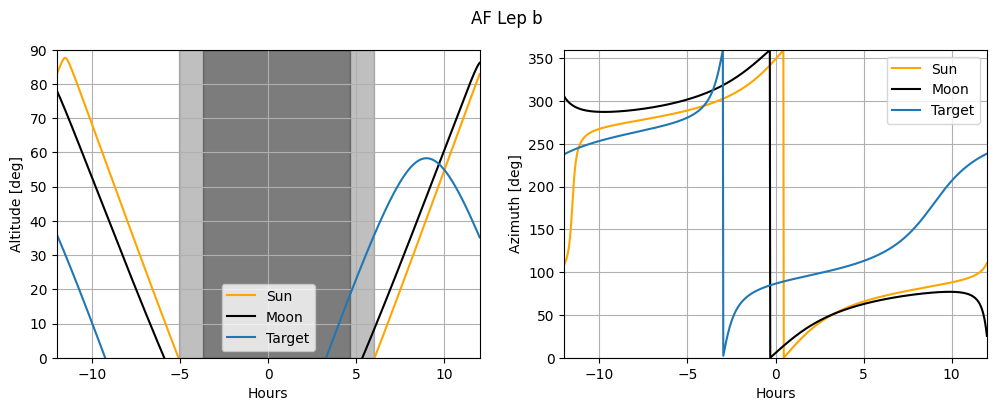

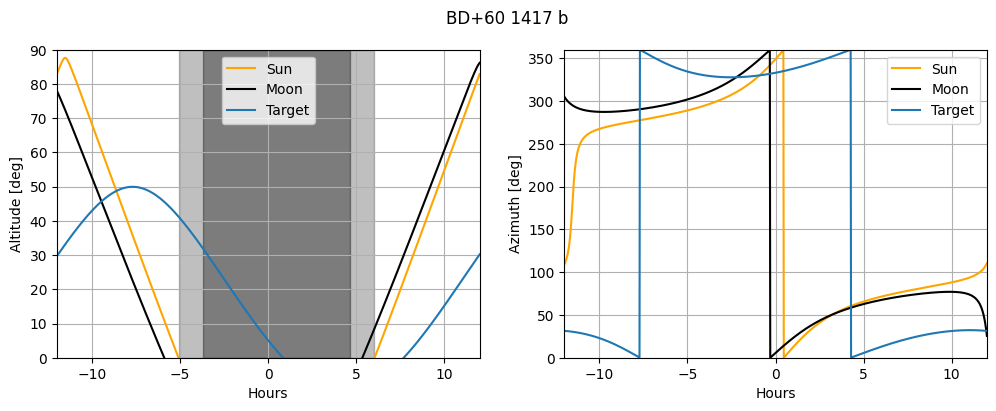

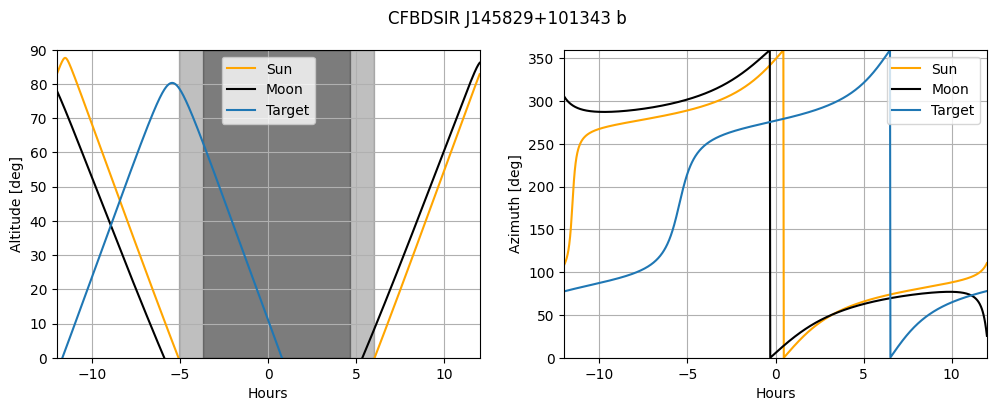

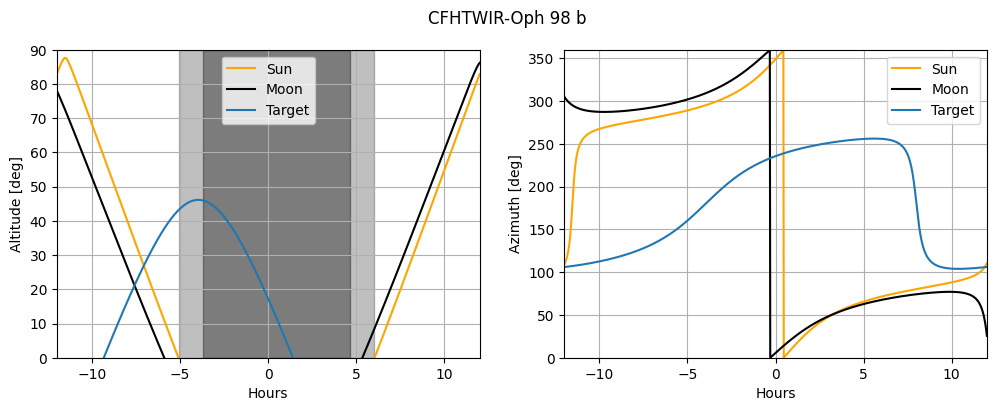

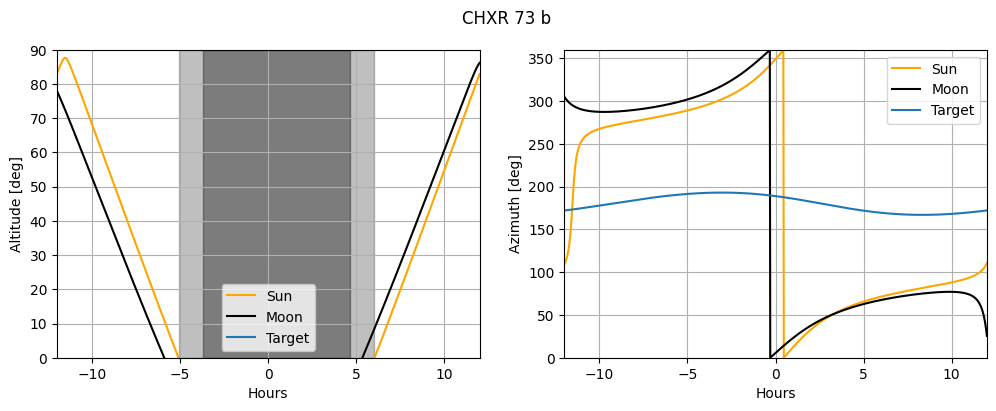

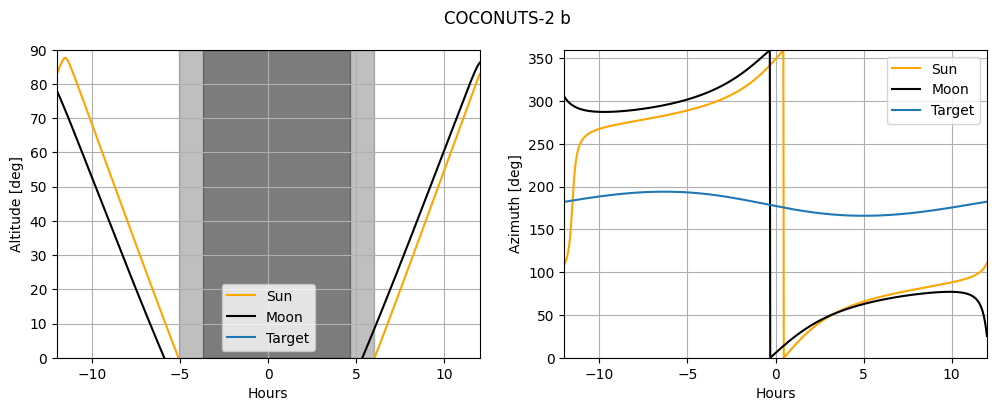

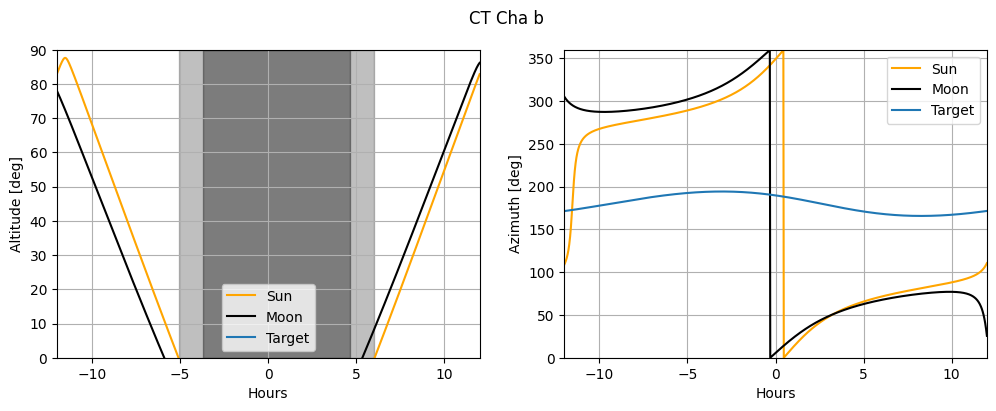

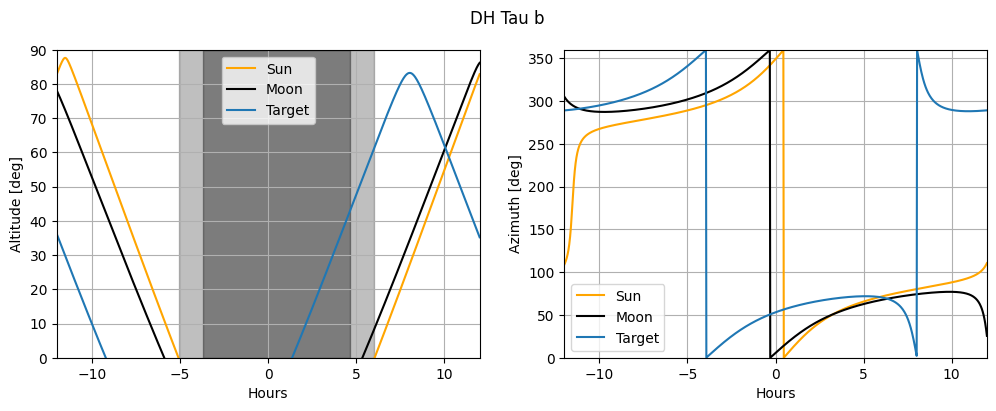

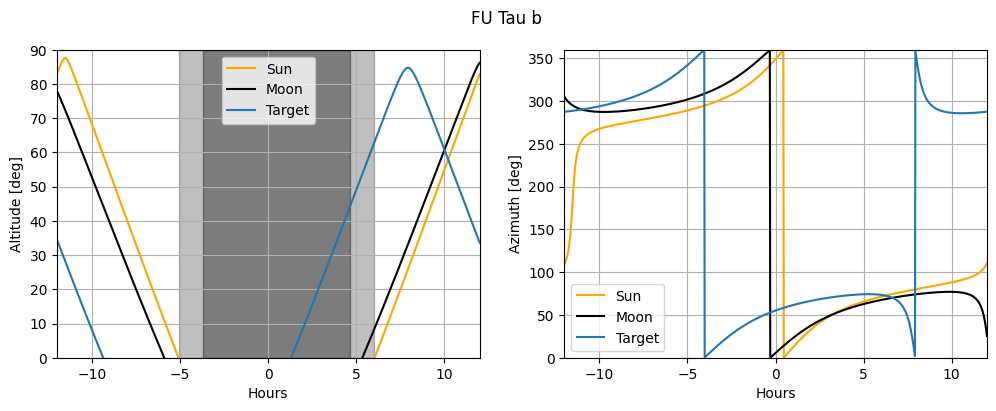

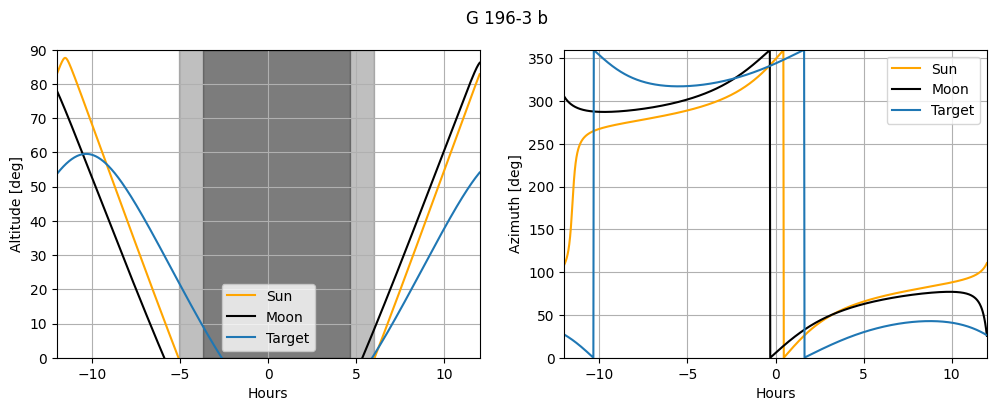

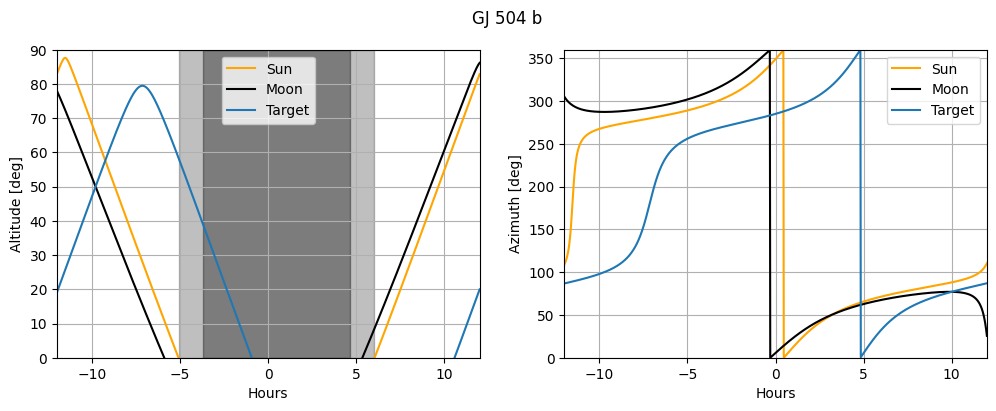

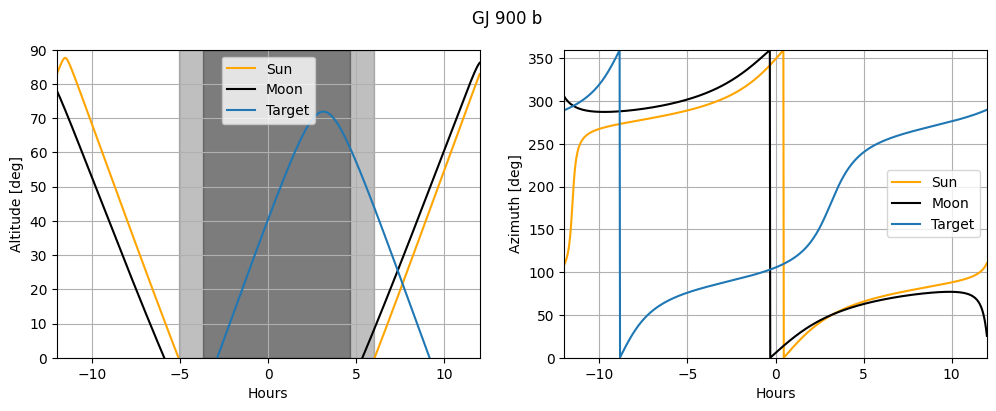

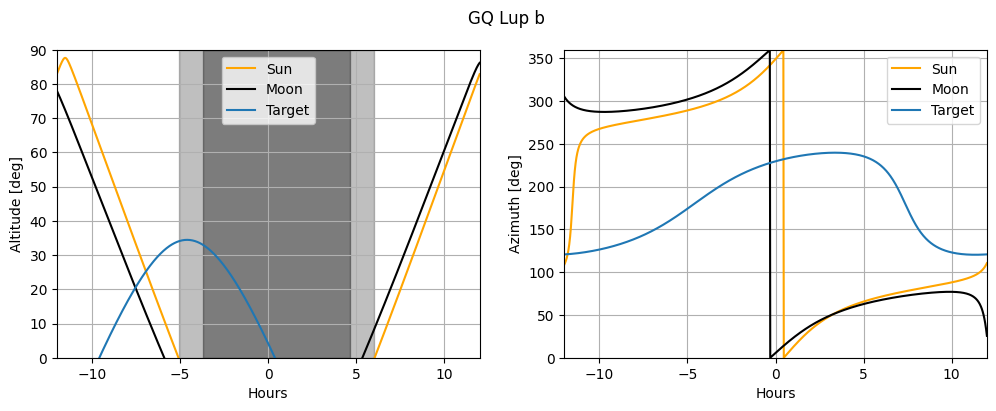

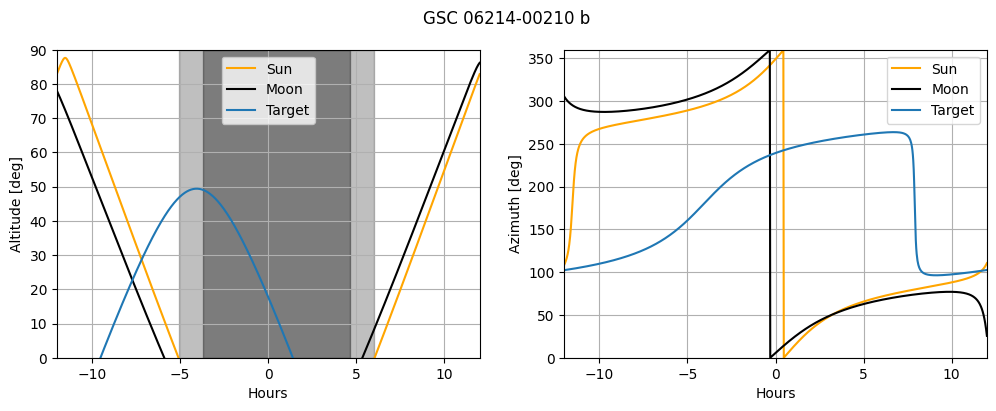

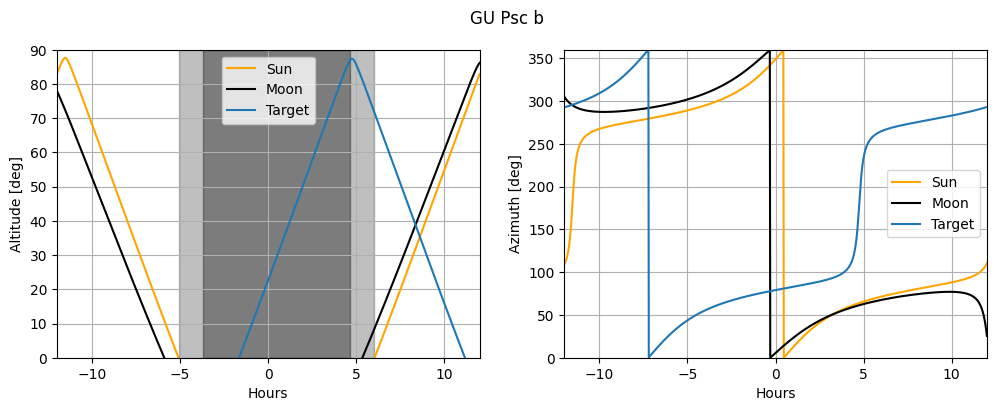

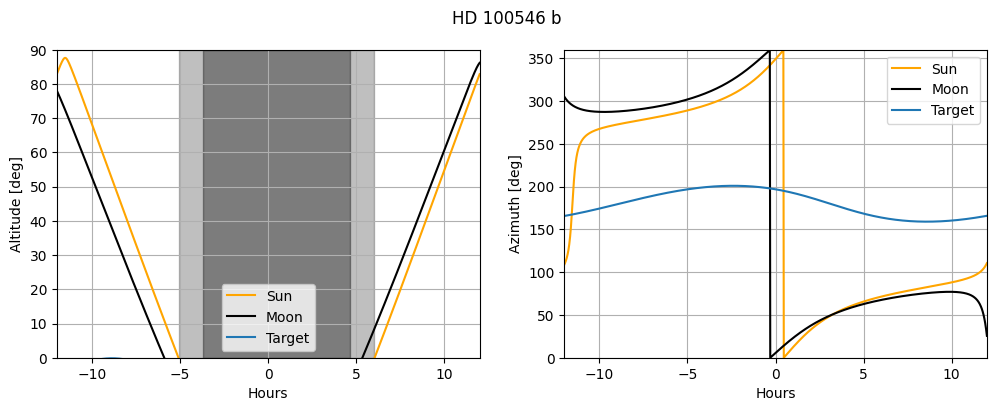

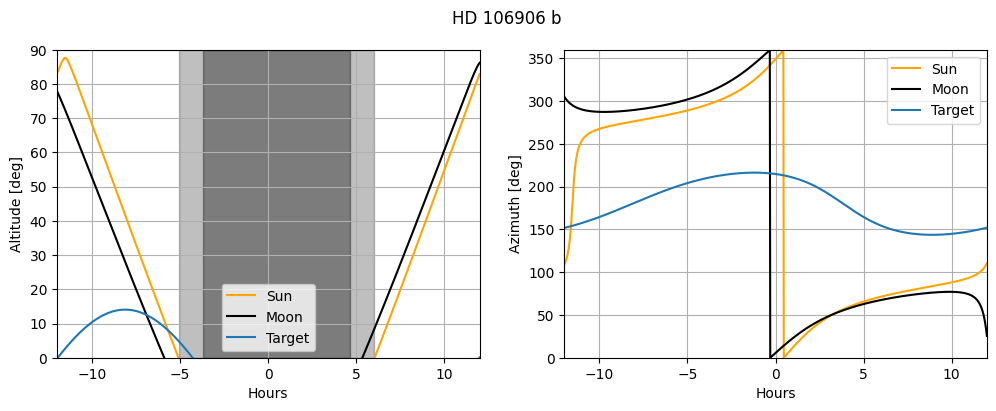

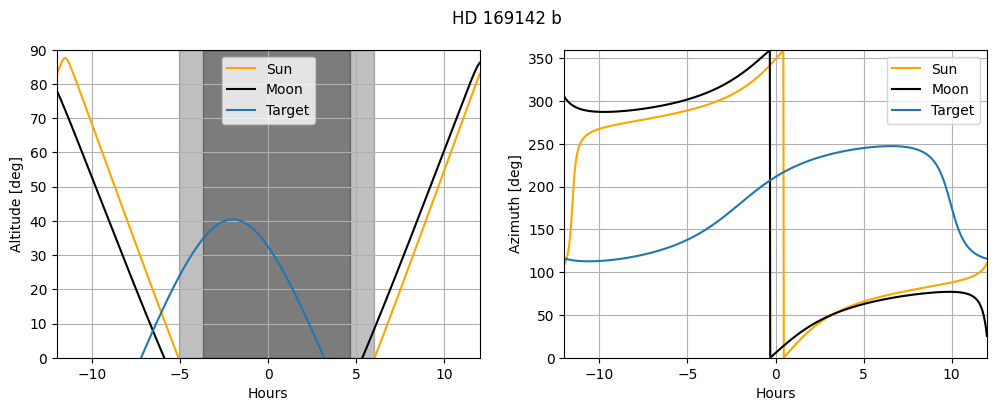

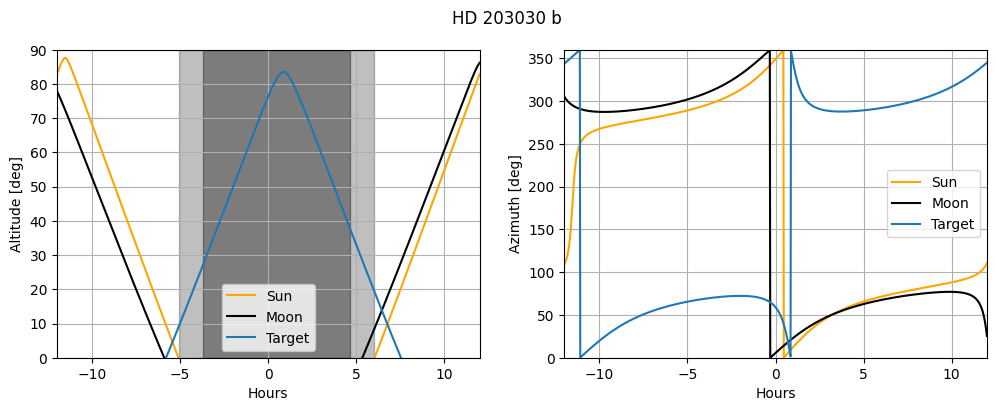

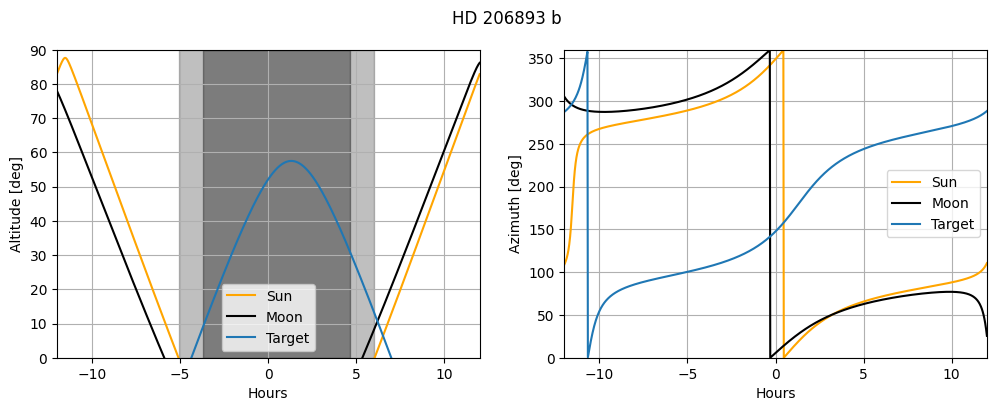

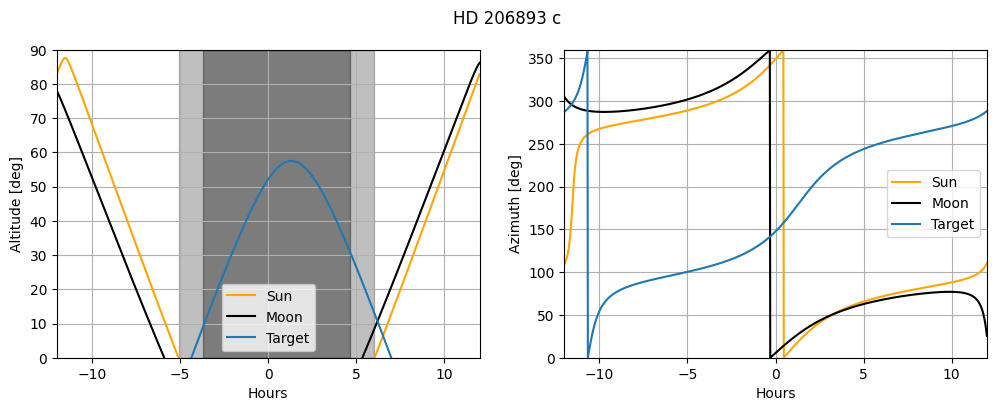

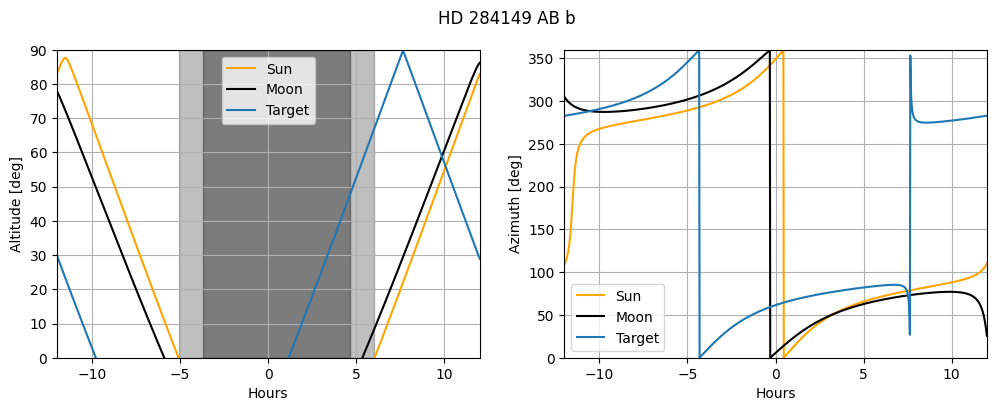

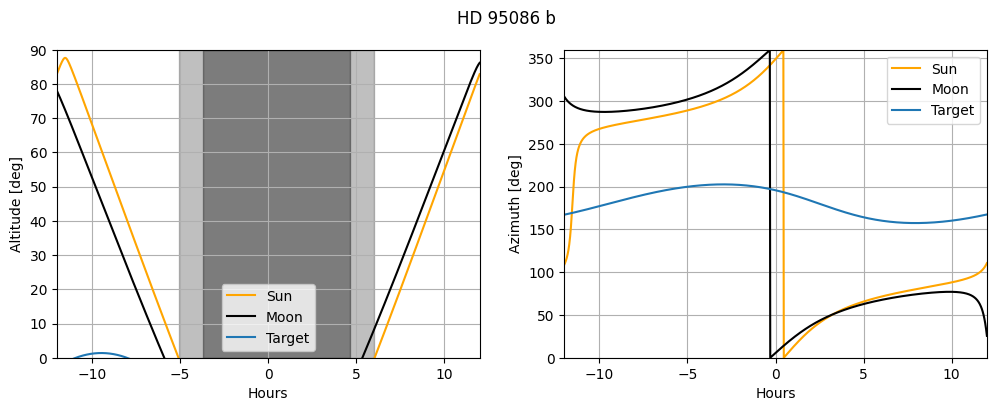

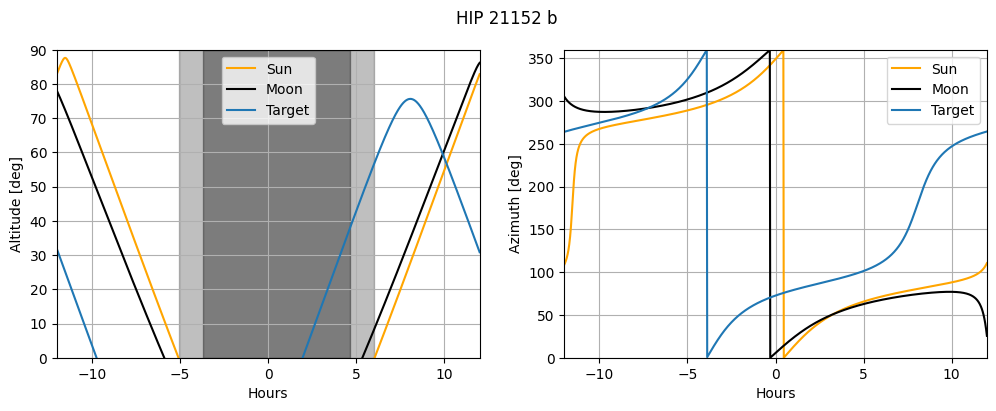

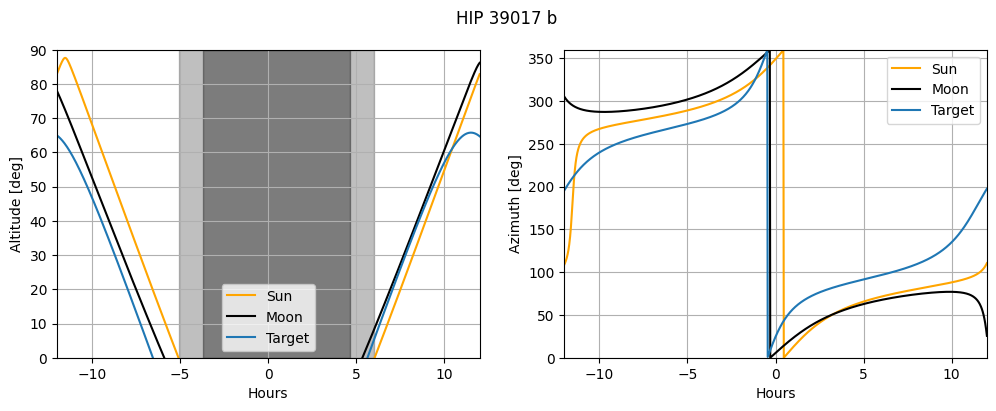

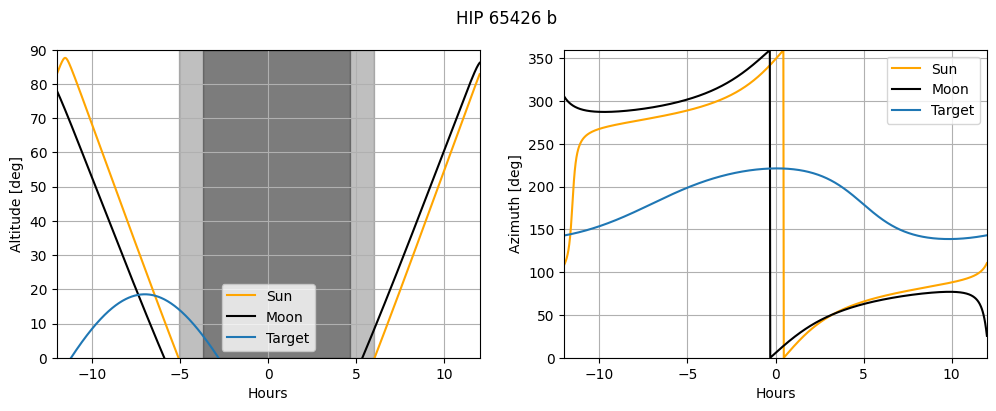

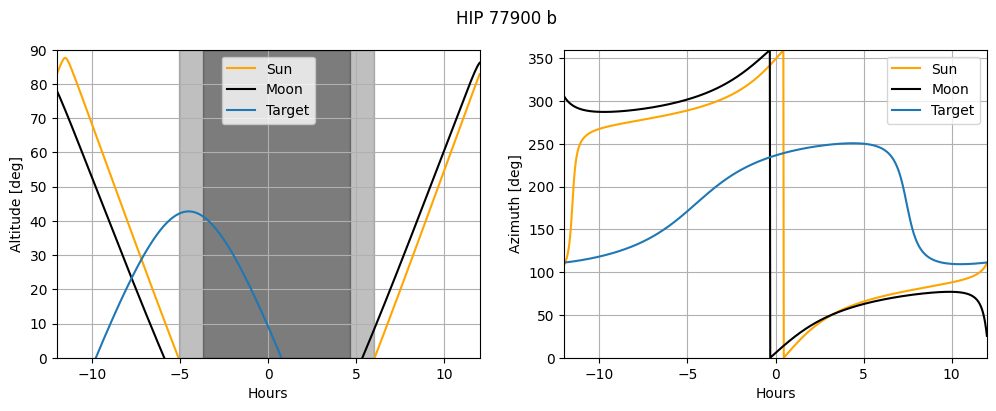

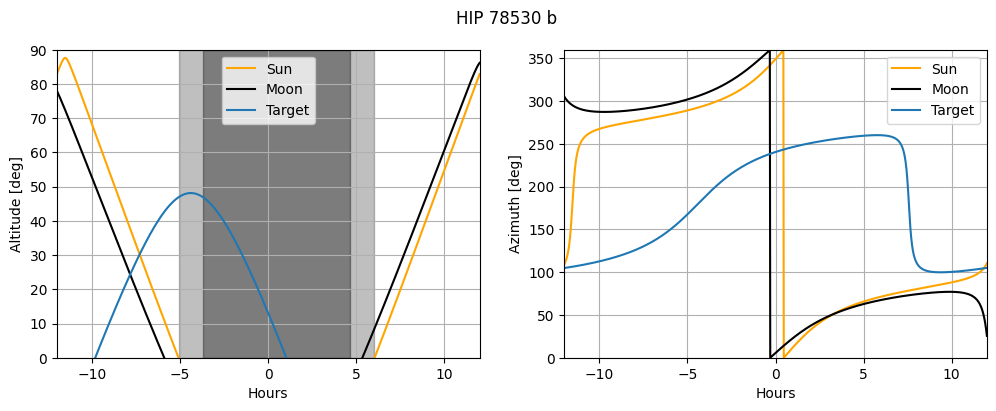

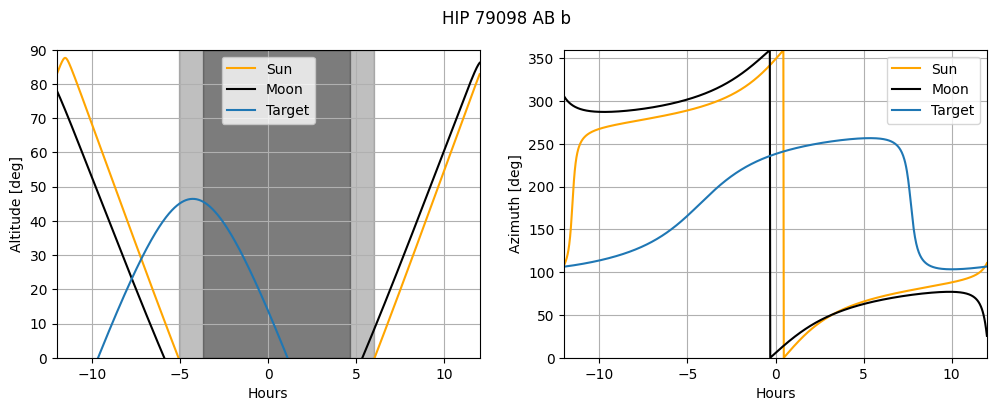

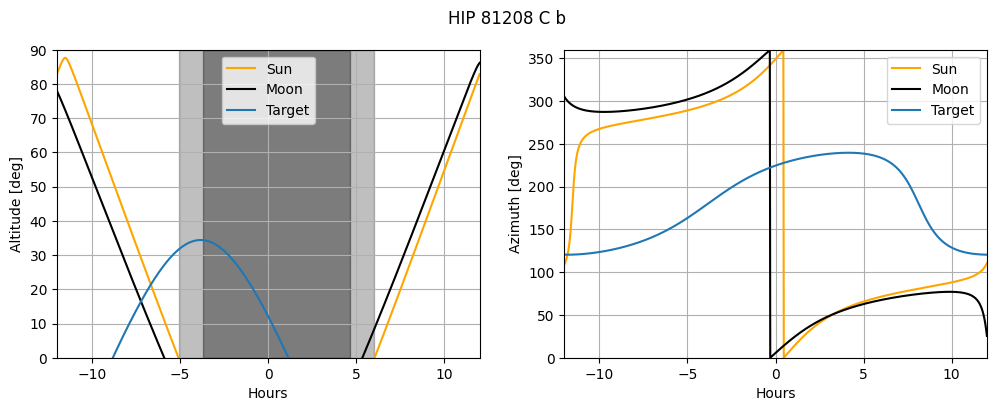

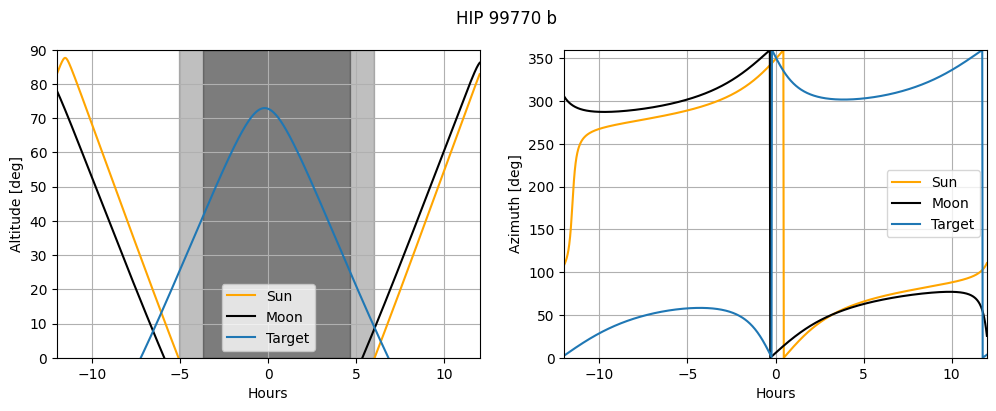

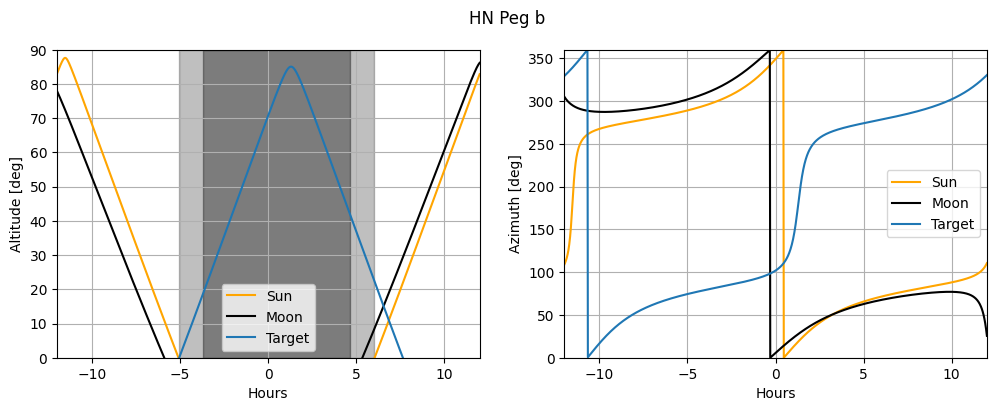

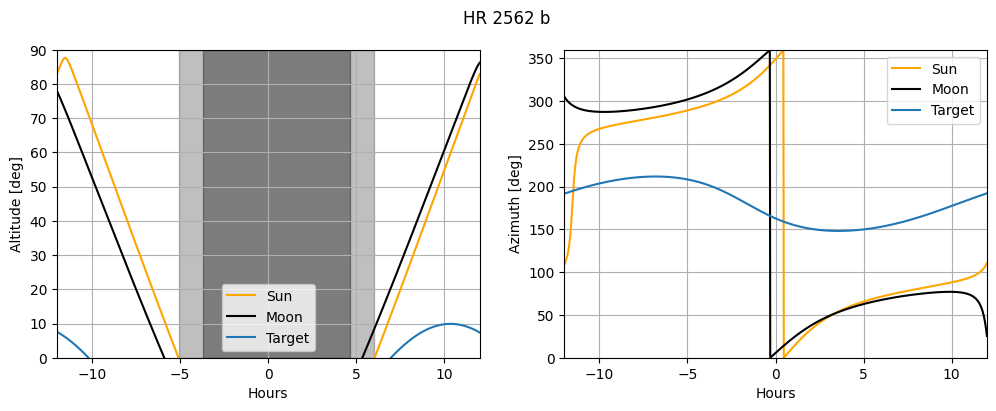

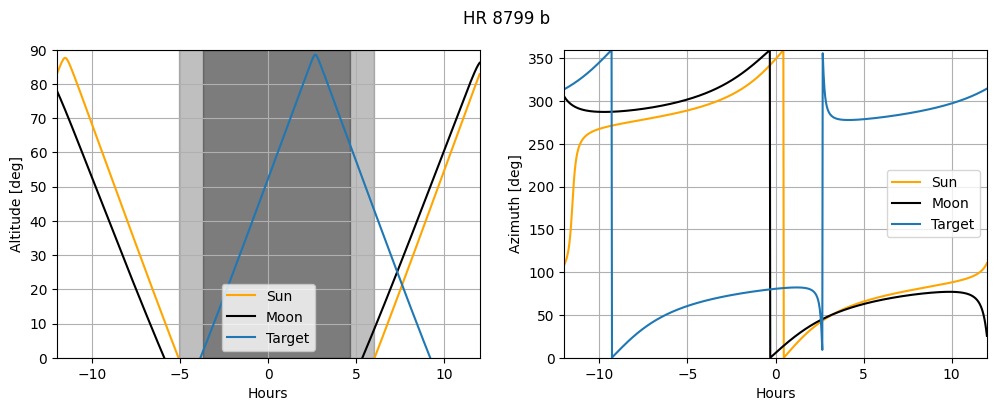

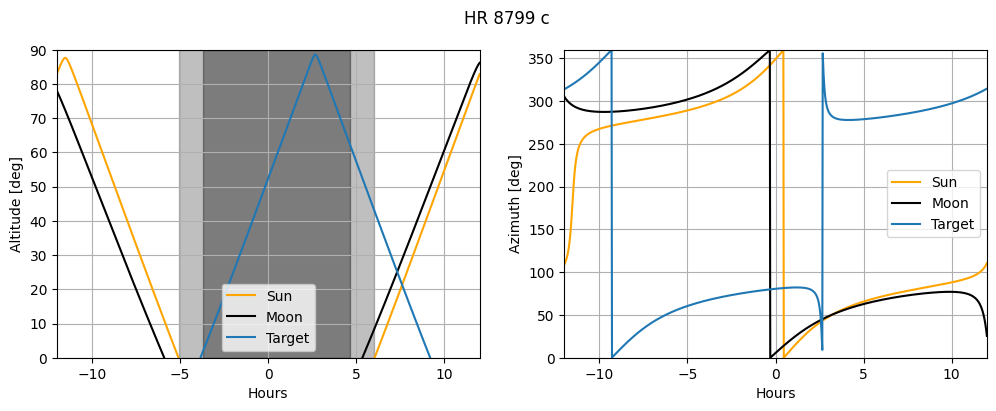

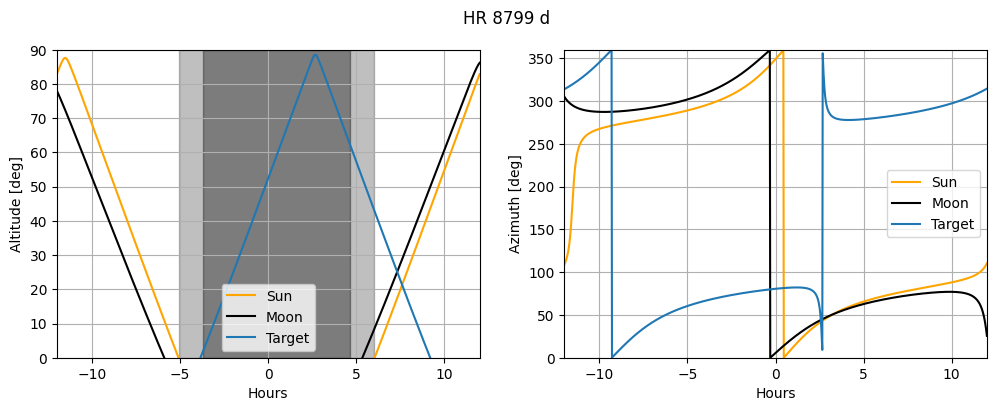

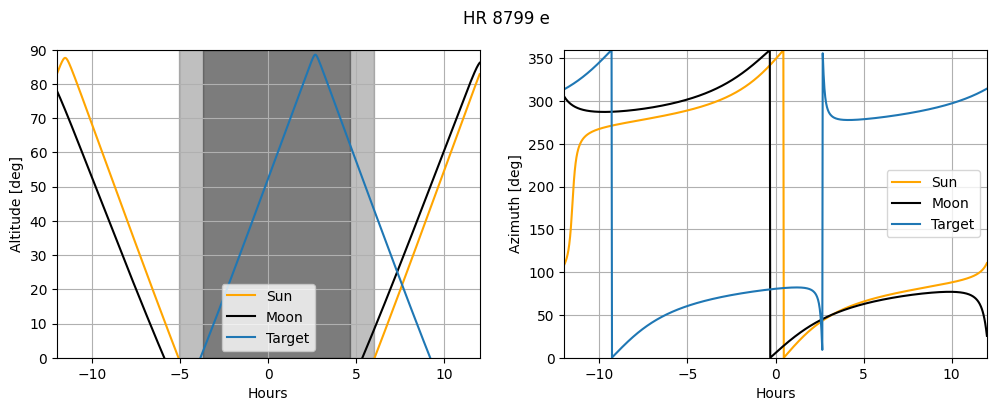

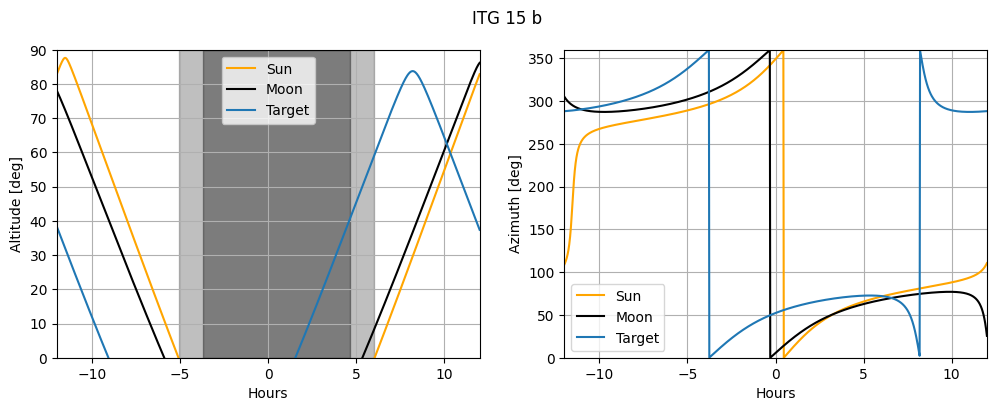

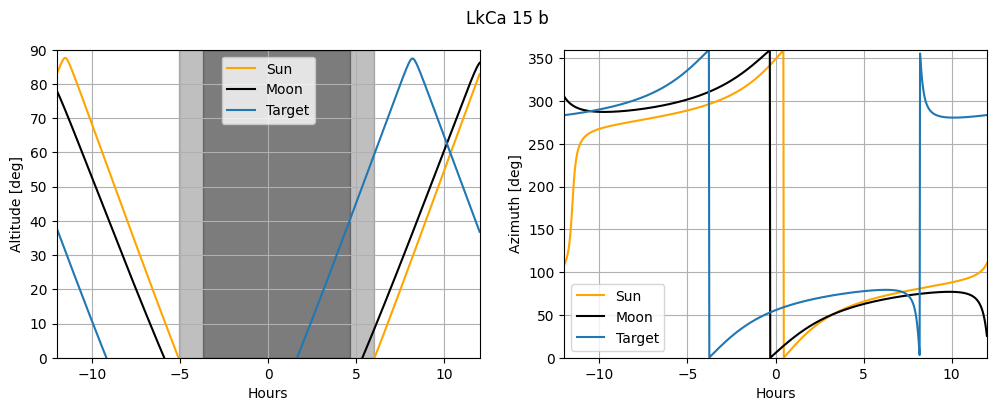

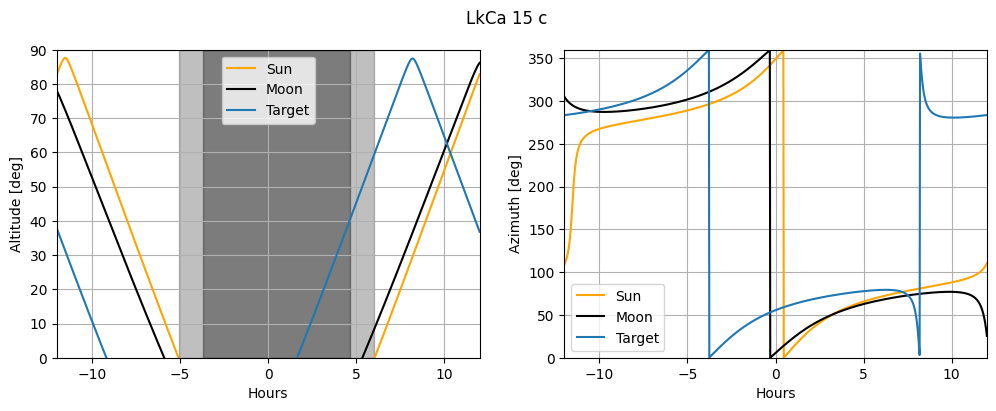

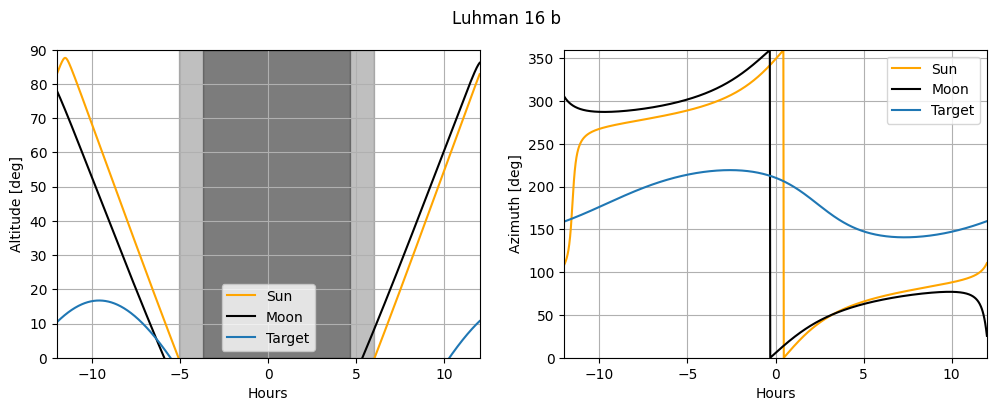

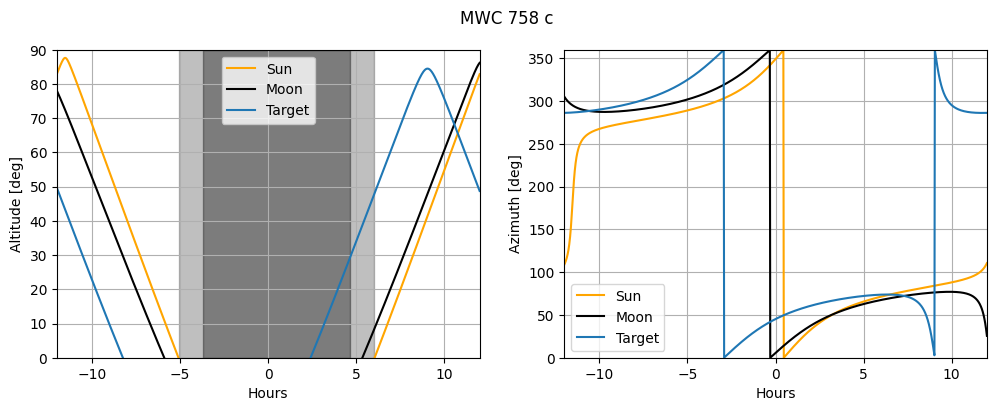

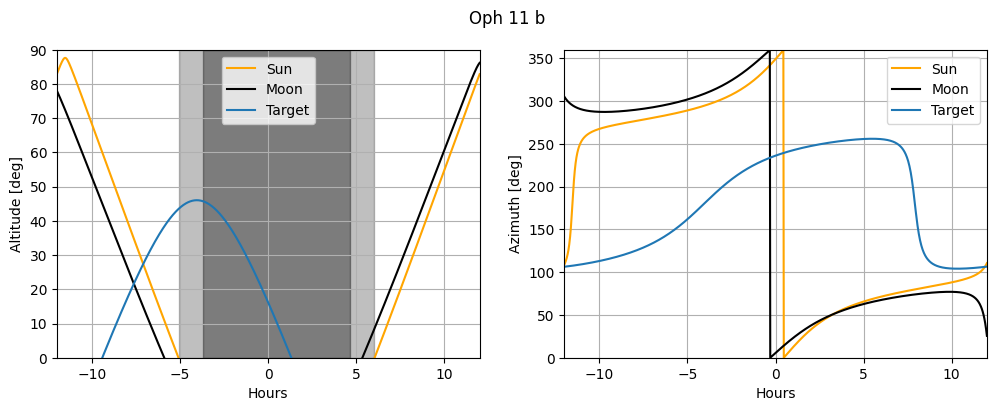

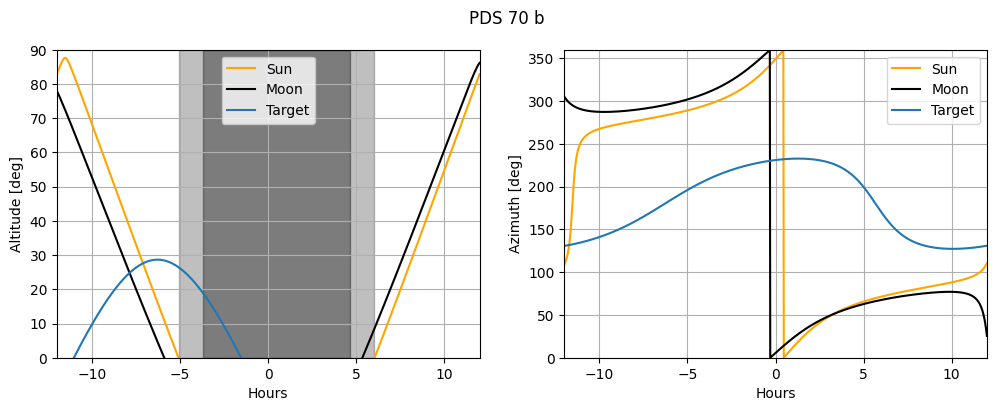

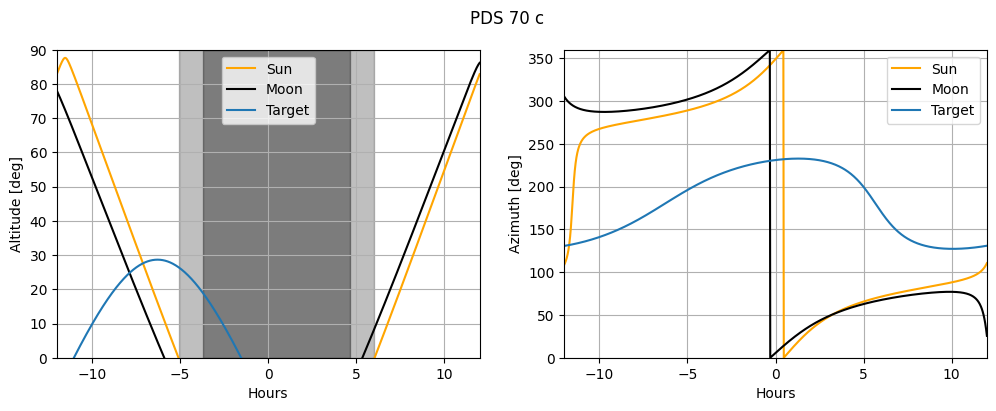

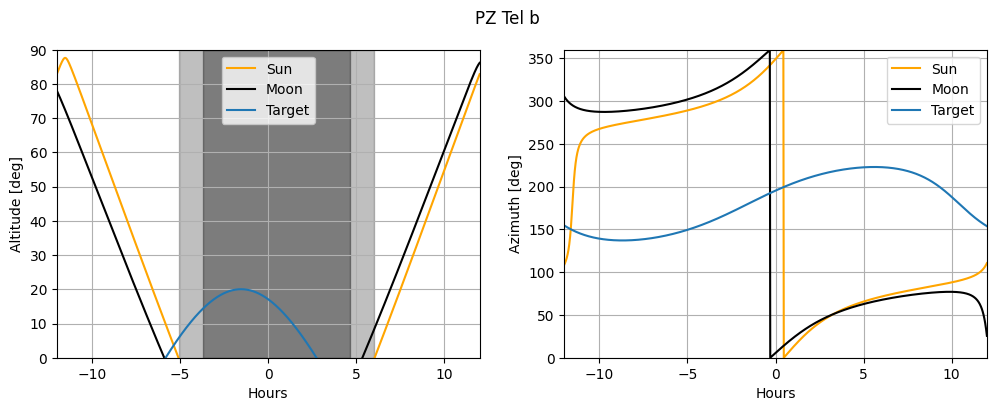

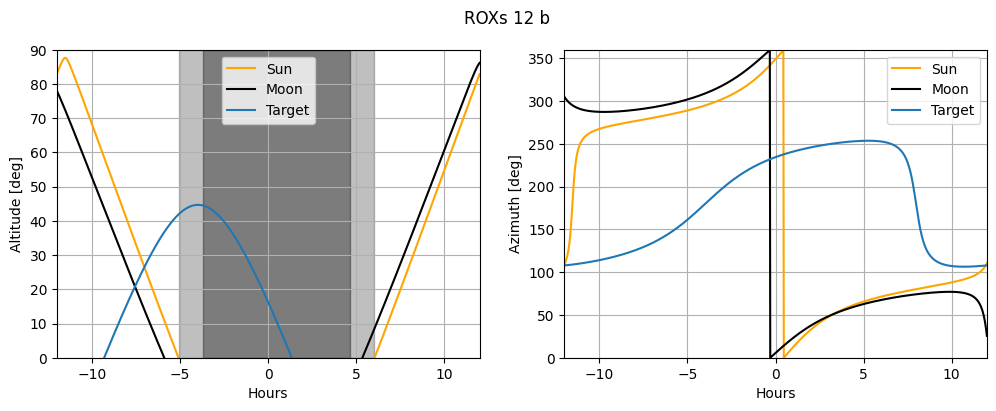

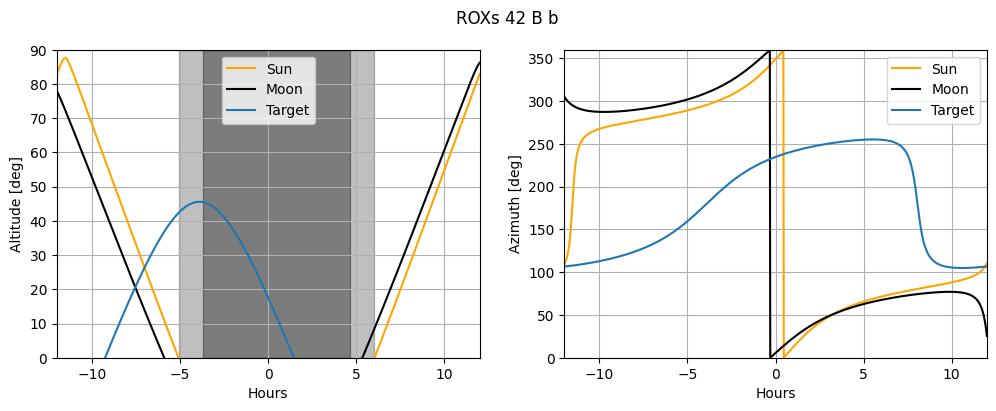

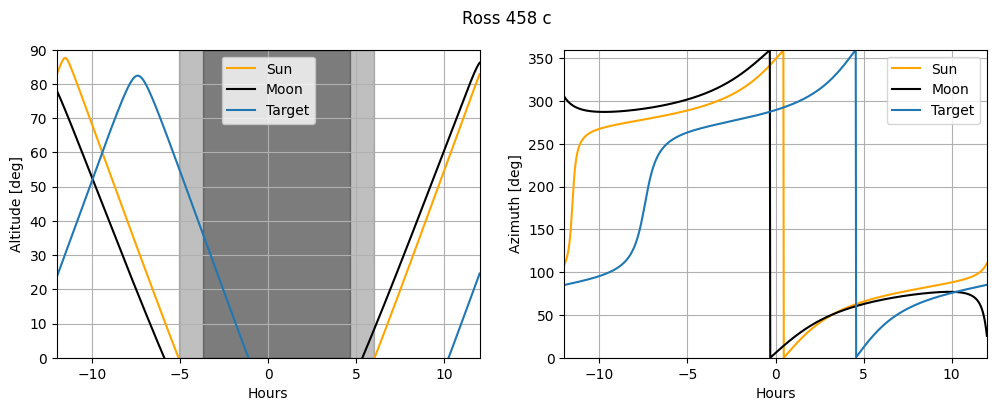

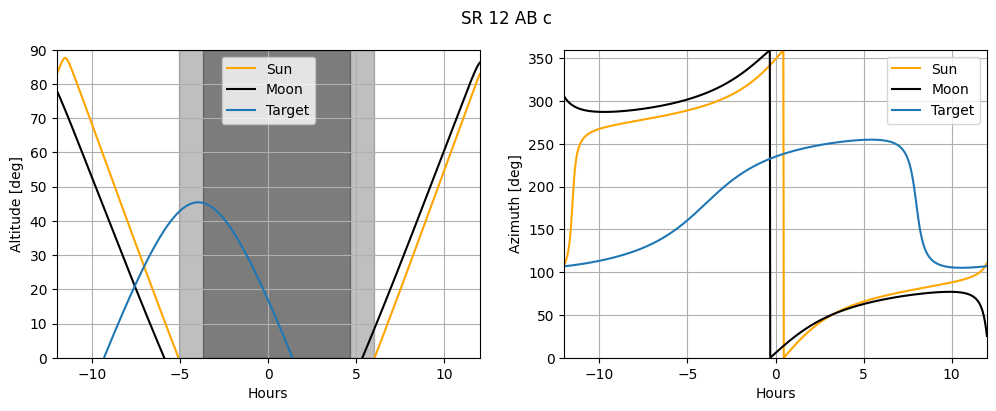

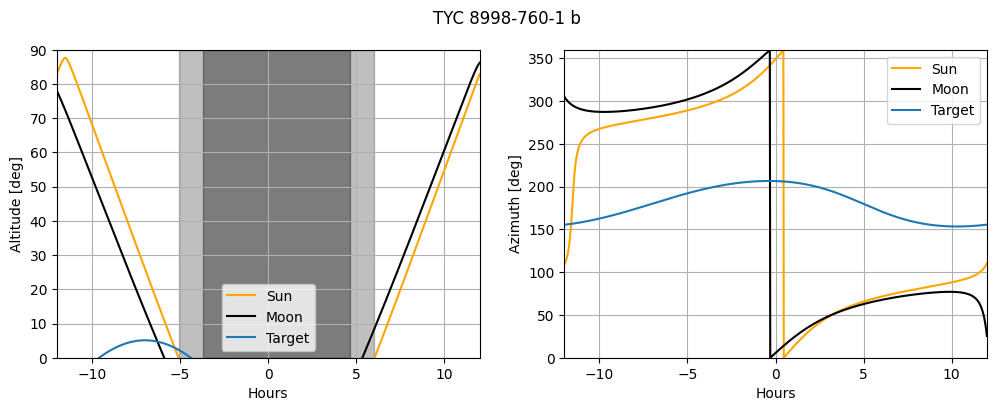

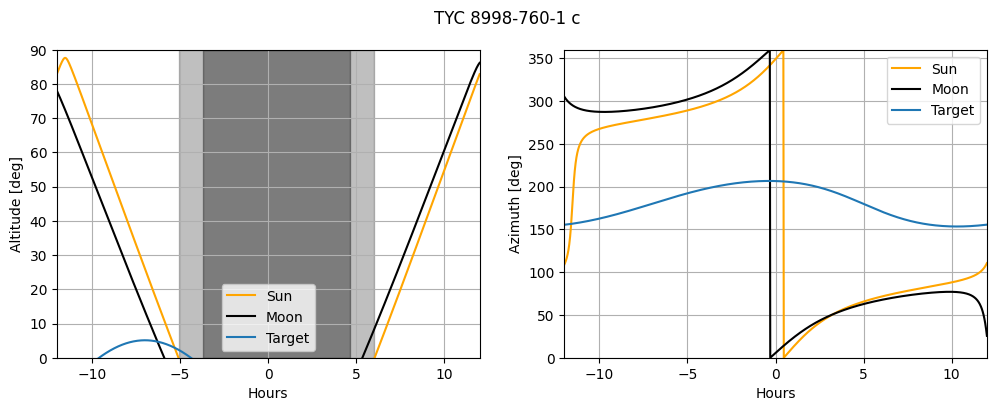

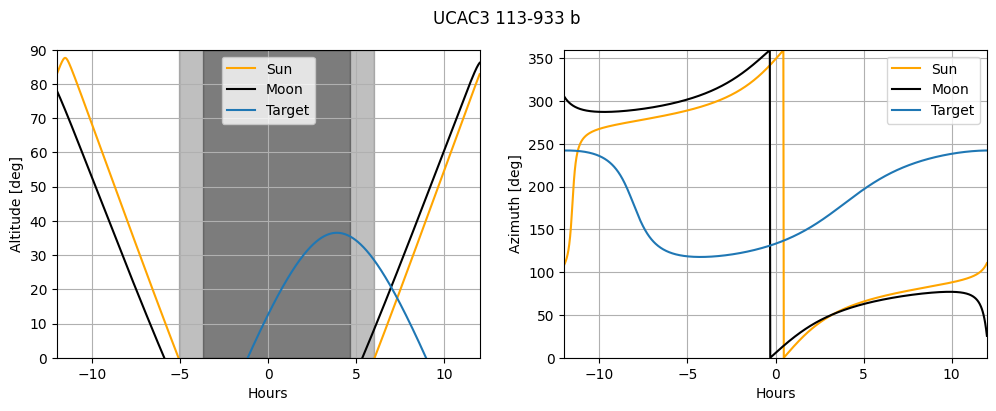

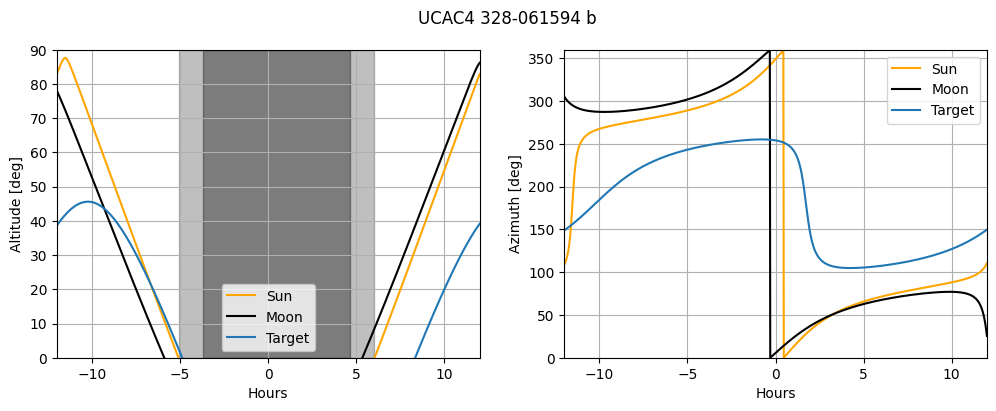

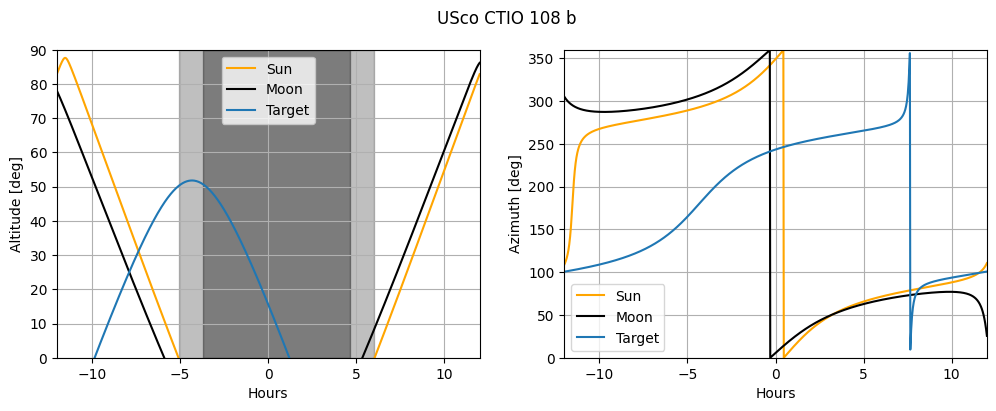

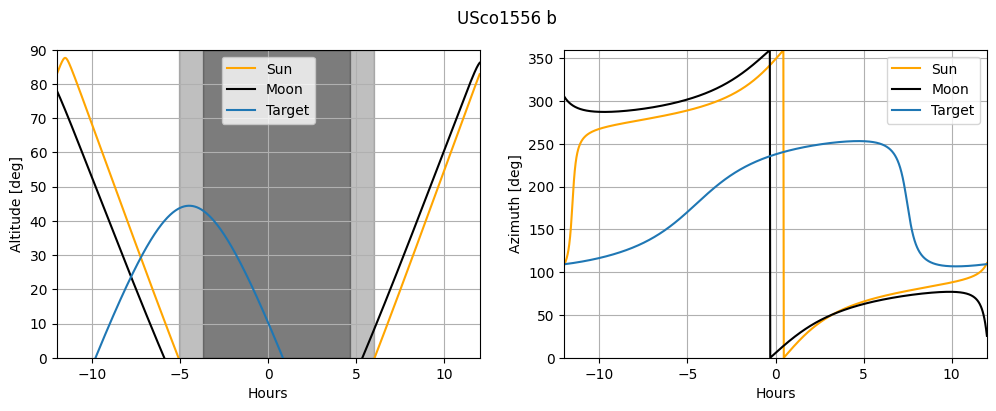

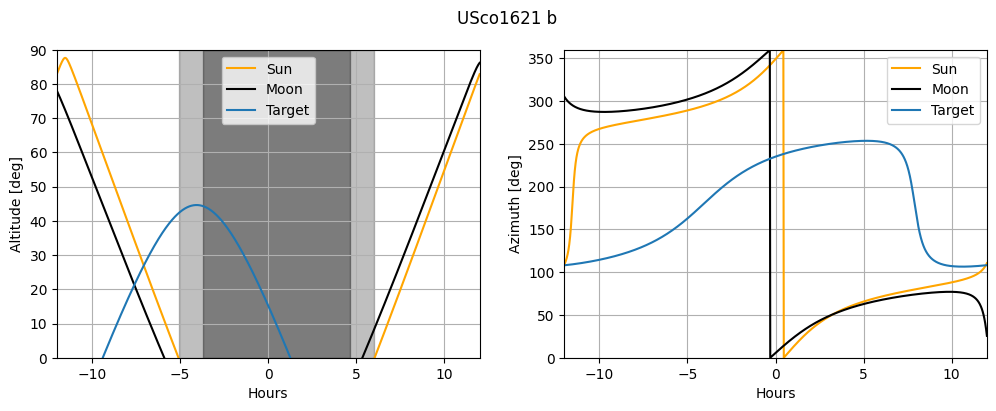

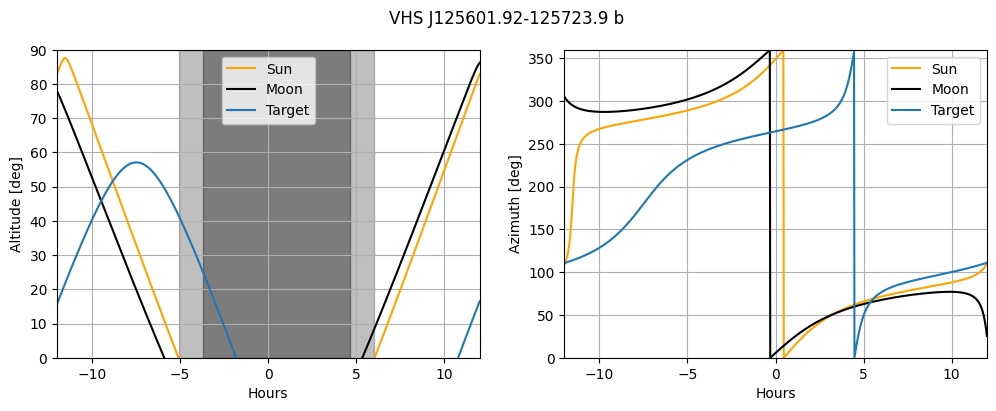

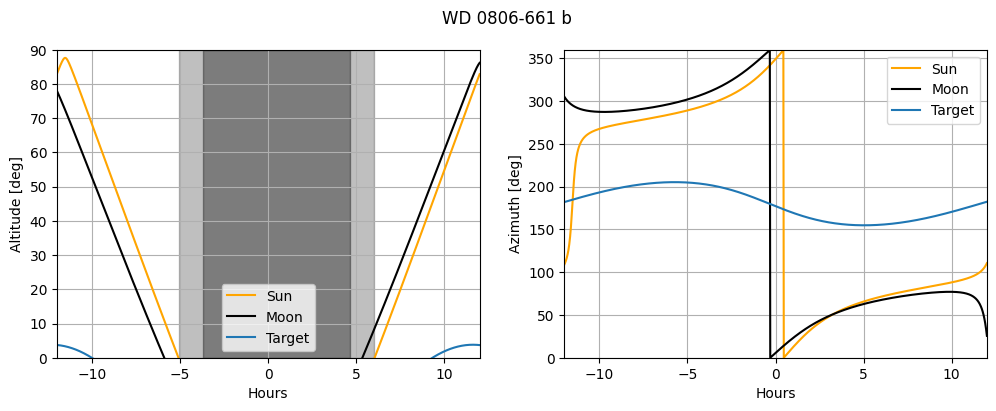

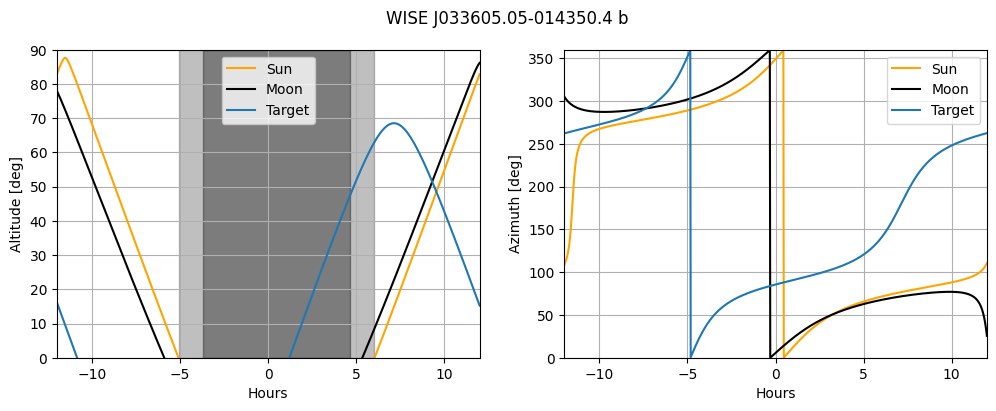

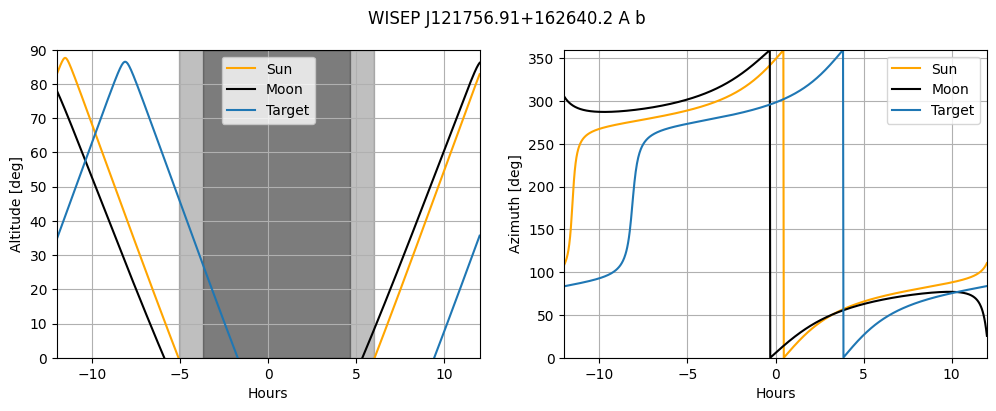

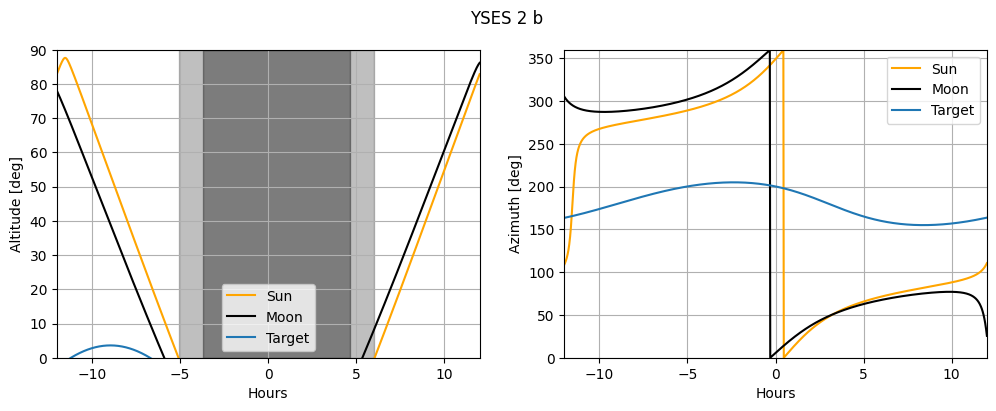

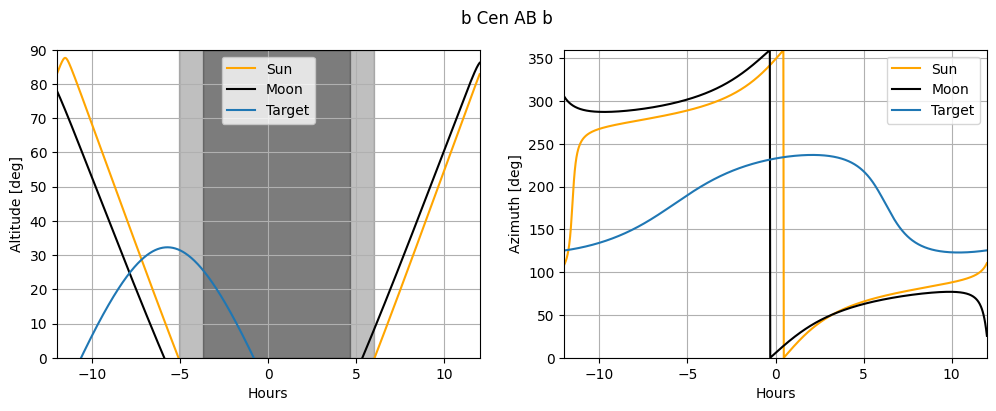

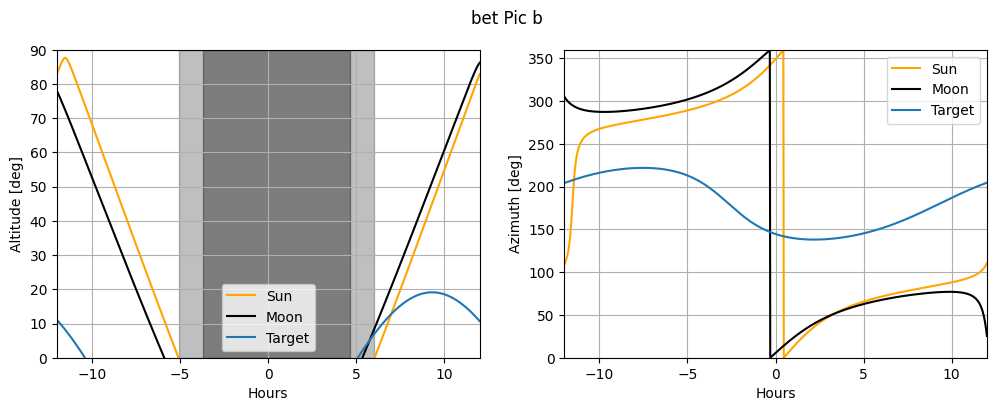

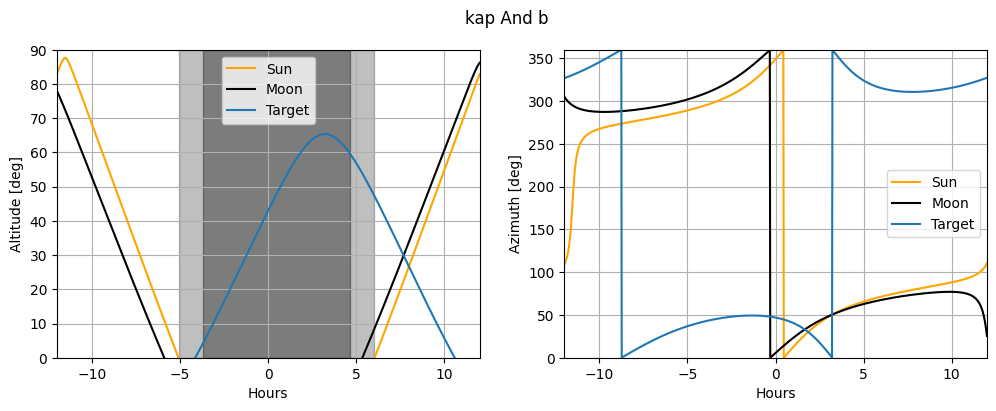

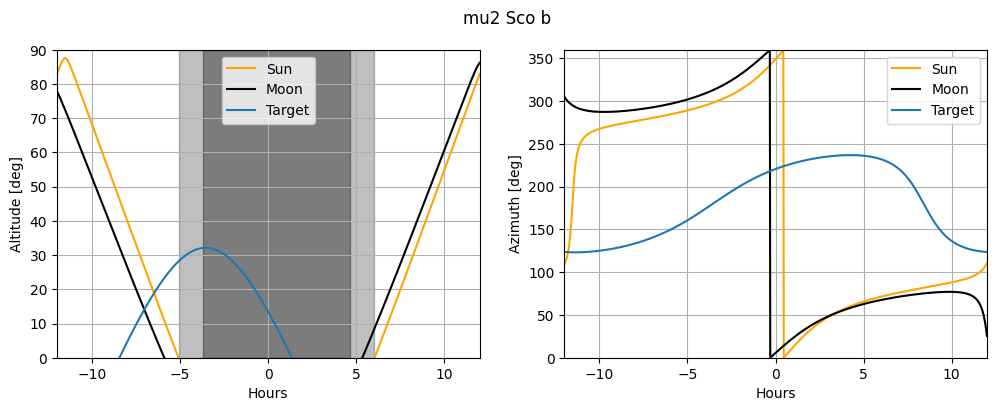

In [262]:
for name, altaz_target in zip(data['pl_name'], altaz_data):
    fig, axs = plt.subplots(1,2, figsize=(12,4))
    
    axs[0].plot(delta_midnight, altaz_sun.alt, label='Sun', color='orange')
    axs[0].plot(delta_midnight, altaz_moon.alt, label='Moon', color='black')
    axs[0].plot(delta_midnight, altaz_target.alt, label='Target', color='C0')
    
    axs[0].fill_between(delta_midnight.value, 0 , 90 , altaz_sun.alt < 0 * u.deg, alpha=0.25, color='k')
    axs[0].fill_between(delta_midnight.value, 0 , 90 , altaz_sun.alt < -18 * u.deg, alpha=0.35, color='k')
    
    axs[0].set_xlim(-12,12)
    axs[0].set_ylim(0, 90)
    
    axs[0].set_xlabel('Hours')
    axs[0].set_ylabel('Altitude [deg]')
    
    axs[1].plot(delta_midnight, altaz_sun.az, label='Sun', color='orange')
    axs[1].plot(delta_midnight, altaz_moon.az, label='Moon', color='black')
    axs[1].plot(delta_midnight, altaz_target.az, label='Target', color='C0')
    
    axs[1].set_xlabel('Hours')
    axs[1].set_ylabel('Azimuth [deg]')
    
    axs[1].set_xlim(-12,12)
    axs[1].set_ylim(0, 360)

    fig.suptitle(name)
    
    for ax in axs:
        ax.legend()
        ax.grid()
    plt.show()

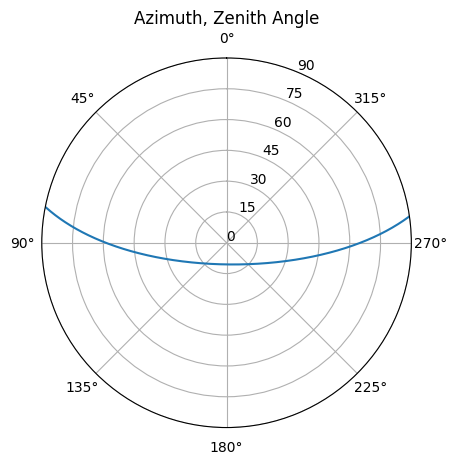

In [131]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.plot(np.deg2rad(altaz_moon.az), altaz_moon.zen)

ax.set_rmin(0)
ax.set_rmax(90)

tick_spacing = 15
ax.set_rticks(np.arange(0,90+tick_spacing,tick_spacing))  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line

ax.grid(True)
ax.set_theta_direction(1)
ax.set_theta_offset(np.deg2rad(90))

ax.set_title('Azimuth, Zenith Angle')
plt.show()